In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
# Load the image
image = Image.open("sample.jpg")

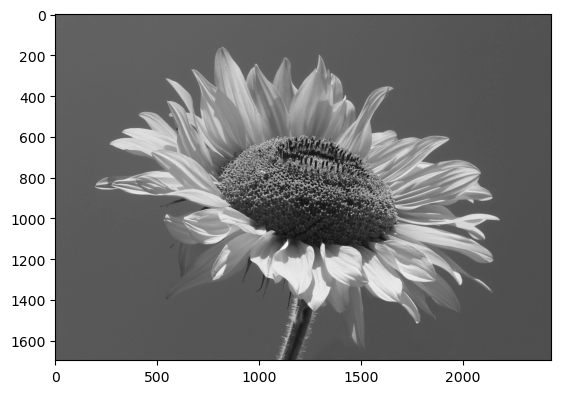

In [3]:
# Convert image to grayscale
image = image.convert("L")
plt.imshow(image, cmap='gray')

In [4]:
# Convert the image to a NumPy array
image_array = np.array(image)
print(type(image_array))
print(image_array.shape)
print(image_array)


<class 'numpy.ndarray'>
(1697, 2434)
[[ 98 102  99 ...  83  84  83]
 [ 98  99 102 ...  84  83  84]
 [ 99  97  98 ...  83  83  83]
 ...
 [ 90  91  90 ...  77  77  77]
 [ 90  89  92 ...  77  78  77]
 [ 93  90  91 ...  78  79  78]]


In [5]:
# Perform eigenvalue decomposition on the covariance matrix
cov_array = np.cov(image_array,rowvar=False)
e_val, e_vect = np.linalg.eig(cov_array)
print(e_val)
print(e_vect)

[ 9.14527057e+05+0.j  6.76106990e+05+0.j  3.45952492e+05+0.j ...
  1.55443001e-14+0.j -2.98980779e-14+0.j  1.04346401e-13+0.j]
[[ 6.55218785e-05+0.j  3.57444194e-04+0.j  2.71531935e-03+0.j ...
   8.96480817e-03+0.j -7.76556348e-03+0.j -8.62628703e-03+0.j]
 [-3.55248358e-05+0.j  2.13660738e-04+0.j  2.63989594e-03+0.j ...
  -4.87683268e-03+0.j  2.47110239e-03+0.j  1.23284741e-03+0.j]
 [ 8.49744771e-05+0.j  2.88296357e-04+0.j  2.73781110e-03+0.j ...
  -1.05215714e-03+0.j  1.18206956e-03+0.j -7.05935934e-04+0.j]
 ...
 [-5.49256207e-05+0.j -1.43898939e-05+0.j  1.19789833e-03+0.j ...
  -3.74076237e-02+0.j  4.04134409e-02+0.j  6.24146749e-02+0.j]
 [ 1.16444771e-05+0.j  5.74674715e-05+0.j  9.87904409e-04+0.j ...
  -1.77174026e-02+0.j -7.01234366e-03+0.j  4.15682613e-03+0.j]
 [ 8.51422920e-05+0.j  4.10782171e-06+0.j  1.25011140e-03+0.j ...
   2.24069060e-02+0.j  2.09527696e-02+0.j -1.36967961e-02+0.j]]


In [6]:
# Sort eigenvalues and eigenvectors in descending order
# Sort eigenvectors based on their eigenvalues

index = np.argsort(e_val)[::-1]
e_val = e_val[index]
e_vect = e_vect[:,index]


In [7]:
# Keep only the dominant eigenvalues and eigenvectors
num_components = 100  # Number of components to keep
e_val = e_val[:num_components]
e_vect = e_vect[:, range(num_components)]

In [8]:
# Reconstruct the image using the dominant eigenvectors
proj = np.dot(image_array, e_vect)
projection = np.dot(proj, e_vect.T)
reconstructed_image = projection.reshape(image_array.shape).astype(np.uint8)


C:\Users\Legion 5 Pro\AppData\Local\Temp\ipykernel_7084\460415937.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
  reconstructed_image = projection.reshape(image_array.shape).astype(np.uint8)


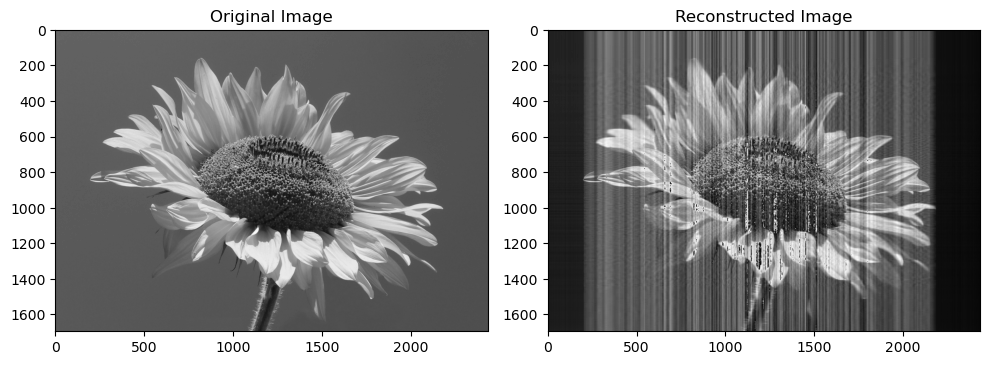

In [9]:
# Display the original and reconstructed images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_image, cmap="gray")
plt.title("Reconstructed Image")
plt.tight_layout()
plt.show()